In [1]:
import importlib
import kmeans
importlib.reload(kmeans)
import numpy as np
import matplotlib.pyplot as plt
import hawks
import timeit

ModuleNotFoundError: No module named 'hawks'

# Small data with chart

In [ ]:
SEED_NUM = 42

In [ ]:
config = {
    "hawks": {
        "folder_name": "SimpleExample",
        "seed_num": 42,
        "save_best_data": True,
    },
    "dataset": {
        "num_clusters": 5,
        "num_dims": 2,
        "num_examples": 2000,
    },
    "objectives": {
        "silhouette": {
            "target": 0.6
        }
    },
    "ga": {
        "num_gens": 50,
        "num_indivs": 3,
    }
}

In [ ]:
generator = hawks.create_generator(config)

In [ ]:
generator.run()

d:\program\python3.8\lib\site-packages\hawks\generator.py:196: UserWarning: D:\Mon hoc\Nam 3 ky 2\khai pha du lieu\assignment\SimpleExample already exists - previous results may be overwritten!
  warnings.warn(
Runs:   0%|          | 0/1 [00:00<?, ?it/s]

Generations:   0%|          | 0/49 [00:00<?, ?it/s]

Generations:   2%|▏         | 1/49 [00:00<00:11,  4.08it/s]

Generations:   4%|▍         | 2/49 [00:00<00:14,  3.30it/s]

Generations:   6%|▌         | 3/49 [00:00<00:11,  3.88it/s]

Generations:   8%|▊         | 4/49 [00:01<00:13,  3.23it/s]

Generations:  10%|█         | 5/49 [00:01<00:12,  3.40it/s]

Generations:  12%|█▏        | 6/49 [00:01<00:13,  3.20it/s]

Generations:  14%|█▍        | 7/49 [00:02<00:13,  3.19it/s]

Generations:  16%|█▋        | 8/49 [00:02<00:13,  2.97it/s]

Generations:  18%|█▊        | 9/49 [00:02<00:13,  2.94it/s]

Generations:  20%|██        | 10/49 [00:03<00:13,  2.97it/s]

Generations:  22%|██▏       | 11/49 [00:03<00:13,  2.83it/s]

Generations:  24%|

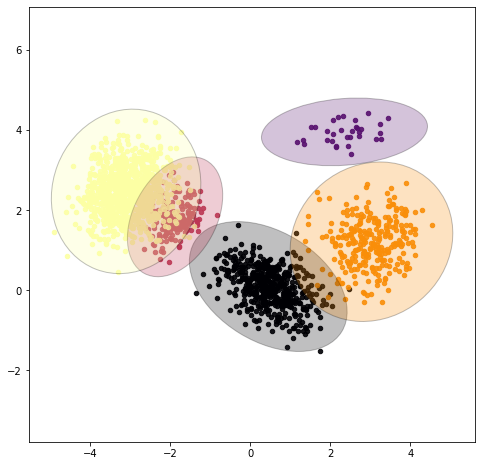

In [ ]:
generator.plot_best_indivs(show=True)

In [ ]:
datasets, label_sets = generator.get_best_dataset()

In [ ]:
data, labels = datasets[0], label_sets[0]

# Some params

In [ ]:
num_cluster = 5
n_iter = 1
point_colors = ['yellow', 'purple', 'cyan', 'magenta', 'orange']

# Random init kmeans

In [ ]:
km = kmeans.KMeans(n_clusters=num_cluster, tol=1e-4)

In [ ]:
%%time
km.fit(data, verbose=True)

Iteration  0 / 1000
Labels_changed :  204
Iteration  1 / 1000
Labels_changed :  108
Iteration  2 / 1000
Labels_changed :  98
Iteration  3 / 1000
Labels_changed :  89
Iteration  4 / 1000
Labels_changed :  75
Iteration  5 / 1000
Labels_changed :  64
Iteration  6 / 1000
Labels_changed :  57
Iteration  7 / 1000
Labels_changed :  50
Iteration  8 / 1000
Labels_changed :  51
Iteration  9 / 1000
Labels_changed :  56
Iteration  10 / 1000
Labels_changed :  86
Iteration  11 / 1000
Labels_changed :  105
Iteration  12 / 1000
Labels_changed :  80
Iteration  13 / 1000
Labels_changed :  81
Iteration  14 / 1000
Labels_changed :  128
Iteration  15 / 1000
Labels_changed :  239
Iteration  16 / 1000
Labels_changed :  201
Iteration  17 / 1000
Labels_changed :  81
Iteration  18 / 1000
Labels_changed :  62
Iteration  19 / 1000
Labels_changed :  53
Iteration  20 / 1000
Labels_changed :  72
Iteration  21 / 1000
Labels_changed :  63
Iteration  22 / 1000
Labels_changed :  44
Iteration  23 / 1000
Labels_changed : 

Time:  0
stopped because of tol
number of iter :  9
Inerita:  1103.518660029164


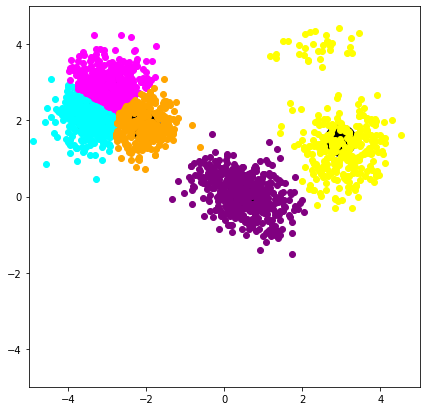

Wall time: 473 ms


In [ ]:
%%time
for it in range(n_iter):
    print("Time: ", it)
    km.fit(data, verbose=False)
    print("Inerita: ", km.inerita_)
    plt.figure(figsize=(7,7))
    for i in range(num_cluster):
        plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], s = 1000, color='black')
        plt.scatter(data[km.label_ == i][:, 0], data[km.label_ == i][:, 1], color = point_colors[i])
        plt.xlim([-5, 5])
        plt.ylim([-5, 5])
    plt.show()

# Kmeans plus plus

In [ ]:
km = kmeans.KMeans(n_clusters=num_cluster, init='kmeansplusplus', tol=1e-4)

In [ ]:
%%time
km.fit(data)

Iteration  0 / 1000
Labels_changed :  152
Iteration  1 / 1000
Labels_changed :  110
Iteration  2 / 1000
Labels_changed :  85
Iteration  3 / 1000
Labels_changed :  77
Iteration  4 / 1000
Labels_changed :  62
Iteration  5 / 1000
Labels_changed :  51
Iteration  6 / 1000
Labels_changed :  40
Iteration  7 / 1000
Labels_changed :  39
Iteration  8 / 1000
Labels_changed :  28
Iteration  9 / 1000
Labels_changed :  18
Iteration  10 / 1000
Labels_changed :  15
Iteration  11 / 1000
Labels_changed :  8
Iteration  12 / 1000
Labels_changed :  7
Iteration  13 / 1000
Labels_changed :  8
Iteration  14 / 1000
Labels_changed :  4
Iteration  15 / 1000
Labels_changed :  1
stopped because of tol
number of iter :  15
Wall time: 459 ms


Time:  0
stopped because of tol
number of iter :  13
Inerita:  1065.474218875851


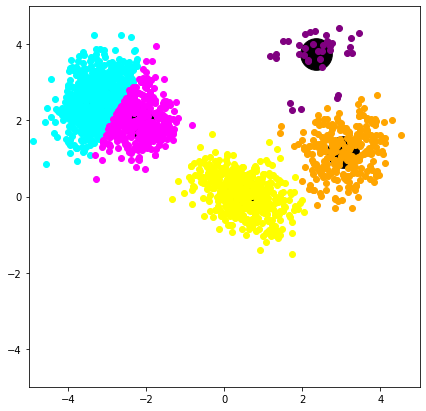

Wall time: 631 ms


In [ ]:
%%time
for it in range(n_iter):
    print("Time: ", it)
    km.fit(data, verbose=False)
    print("Inerita: ", km.inerita_)
    plt.figure(figsize=(7,7))
    for i in range(num_cluster):
        plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], s = 1000, color='black')
        plt.scatter(data[km.label_ == i][:, 0], data[km.label_ == i][:, 1], color = point_colors[i])
        plt.xlim([-5, 5])
        plt.ylim([-5, 5])
    plt.show()

# Big data

In [ ]:
num_points = 100000

In [ ]:
data = np.random.rand(num_points, 2)

In [ ]:
km = kmeans.KMeans(n_clusters=10, tol=1e-4)

In [ ]:
data.shape

(100000, 2)

In [ ]:
%%time
km.fit(data)

Iteration  0 / 1000
Labels_changed :  11833
Iteration  1 / 1000
Labels_changed :  5740
Iteration  2 / 1000
Labels_changed :  3599
Iteration  3 / 1000
Labels_changed :  2750
Iteration  4 / 1000
Labels_changed :  2319
Iteration  5 / 1000
Labels_changed :  2138
Iteration  6 / 1000
Labels_changed :  2000
Iteration  7 / 1000
Labels_changed :  2056
Iteration  8 / 1000
Labels_changed :  2257
Iteration  9 / 1000
Labels_changed :  2442
Iteration  10 / 1000
Labels_changed :  2455
Iteration  11 / 1000
Labels_changed :  2382
Iteration  12 / 1000
Labels_changed :  1980
Iteration  13 / 1000
Labels_changed :  1604
Iteration  14 / 1000
Labels_changed :  1278
Iteration  15 / 1000
Labels_changed :  1099
Iteration  16 / 1000
Labels_changed :  978
Iteration  17 / 1000
Labels_changed :  888
Iteration  18 / 1000
Labels_changed :  817
stopped because of tol
number of iter :  18
Wall time: 25.6 s


In [ ]:
km.inerita_

1724.359803687081

# Birch dataset 1

In [ ]:
birch_data = np.loadtxt("birch1.txt")
num_clusters = 100

In [ ]:
km = kmeans.KMeans(n_clusters=num_clusters, tol=1)

In [ ]:
%%time
km.fit(birch_data)

Iteration  0 / 1000
Labels_changed :  17828
Iteration  1 / 1000
Labels_changed :  9854
Iteration  2 / 1000
Labels_changed :  6504
Iteration  3 / 1000
Labels_changed :  5110
Iteration  4 / 1000
Labels_changed :  4392
Iteration  5 / 1000
Labels_changed :  3669
Iteration  6 / 1000
Labels_changed :  2902
Iteration  7 / 1000
Labels_changed :  2285
Iteration  8 / 1000
Labels_changed :  1746
Iteration  9 / 1000
Labels_changed :  1467
Iteration  10 / 1000
Labels_changed :  1408
Iteration  11 / 1000
Labels_changed :  1217
Iteration  12 / 1000
Labels_changed :  999
Iteration  13 / 1000
Labels_changed :  752
Iteration  14 / 1000
Labels_changed :  579
Iteration  15 / 1000
Labels_changed :  461
Iteration  16 / 1000
Labels_changed :  405
Iteration  17 / 1000
Labels_changed :  407
Iteration  18 / 1000
Labels_changed :  402
Iteration  19 / 1000
Labels_changed :  444
Iteration  20 / 1000
Labels_changed :  450
Iteration  21 / 1000
Labels_changed :  540
Iteration  22 / 1000
Labels_changed :  591
Iteratio

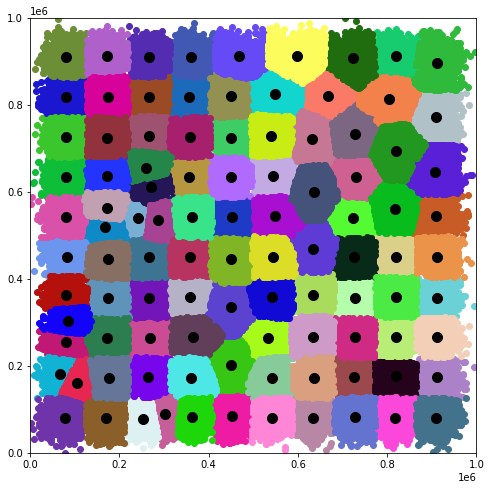

In [ ]:
plt.figure(figsize=(8,8))
for i in range(num_clusters):
    plt.scatter(birch_data[km.label_ == i][:, 0], birch_data[km.label_ == i][:, 1], color=np.random.rand(3,))
    plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], s = 100, color='black')
    plt.xlim([0, 1000000])
    plt.ylim([0, 1000000])
plt.show()

# Birch dataset 1 with kmeans plus plus

In [ ]:
birch_data = np.loadtxt("birch1.txt")
num_clusters = 100

In [ ]:
km = kmeans.KMeans(n_clusters=num_clusters, init="kmeansplusplus")

In [ ]:
%%time
km.fit(birch_data)

Iteration  0 / 1000
Labels_changed :  9990
Iteration  1 / 1000
Labels_changed :  5809
Iteration  2 / 1000
Labels_changed :  3682
Iteration  3 / 1000
Labels_changed :  2764
Iteration  4 / 1000
Labels_changed :  2212
Iteration  5 / 1000
Labels_changed :  1760
Iteration  6 / 1000
Labels_changed :  1400
Iteration  7 / 1000
Labels_changed :  1082
Iteration  8 / 1000
Labels_changed :  857
Iteration  9 / 1000
Labels_changed :  774
Iteration  10 / 1000
Labels_changed :  772
Iteration  11 / 1000
Labels_changed :  783
Iteration  12 / 1000
Labels_changed :  702
Iteration  13 / 1000
Labels_changed :  534
Iteration  14 / 1000
Labels_changed :  485
Iteration  15 / 1000
Labels_changed :  496
Iteration  16 / 1000
Labels_changed :  531
Iteration  17 / 1000
Labels_changed :  577
Iteration  18 / 1000
Labels_changed :  492
Iteration  19 / 1000
Labels_changed :  355
Iteration  20 / 1000
Labels_changed :  231
Iteration  21 / 1000
Labels_changed :  160
Iteration  22 / 1000
Labels_changed :  128
Iteration  23

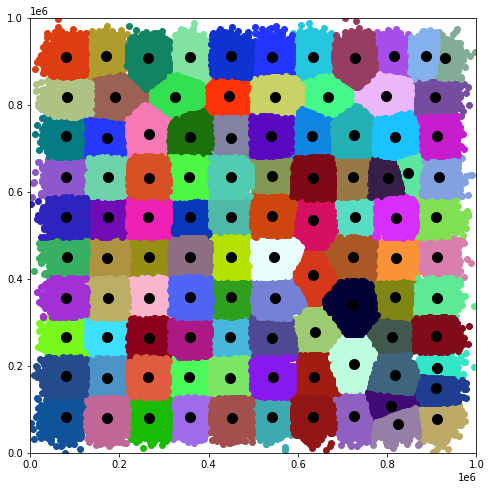

In [ ]:
plt.figure(figsize=(8,8))
for i in range(num_clusters):
    plt.scatter(birch_data[km.label_ == i][:, 0], birch_data[km.label_ == i][:, 1], color=np.random.rand(3,))
    plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], s = 100, color='black')
    plt.xlim([0, 1000000])
    plt.ylim([0, 1000000])
plt.show()

# Birch dataset 2

In [ ]:
birch_data = np.loadtxt("birch2.txt")
num_clusters = 100

In [ ]:
km = kmeans.KMeans(n_clusters=num_clusters, tol=1)

In [ ]:
%%time
km.fit(birch_data)

Iteration  0 / 1000
Labels_changed :  9234
Iteration  1 / 1000
Labels_changed :  3998
Iteration  2 / 1000
Labels_changed :  3019
Iteration  3 / 1000
Labels_changed :  2401
Iteration  4 / 1000
Labels_changed :  1300
Iteration  5 / 1000
Labels_changed :  1152
Iteration  6 / 1000
Labels_changed :  580
Iteration  7 / 1000
Labels_changed :  313
Iteration  8 / 1000
Labels_changed :  226
Iteration  9 / 1000
Labels_changed :  217
Iteration  10 / 1000
Labels_changed :  207
Iteration  11 / 1000
Labels_changed :  231
Iteration  12 / 1000
Labels_changed :  246
Iteration  13 / 1000
Labels_changed :  228
Iteration  14 / 1000
Labels_changed :  182
Iteration  15 / 1000
Labels_changed :  170
Iteration  16 / 1000
Labels_changed :  174
Iteration  17 / 1000
Labels_changed :  194
Iteration  18 / 1000
Labels_changed :  163
Iteration  19 / 1000
Labels_changed :  128
Iteration  20 / 1000
Labels_changed :  81
Iteration  21 / 1000
Labels_changed :  62
Iteration  22 / 1000
Labels_changed :  52
Iteration  23 / 10

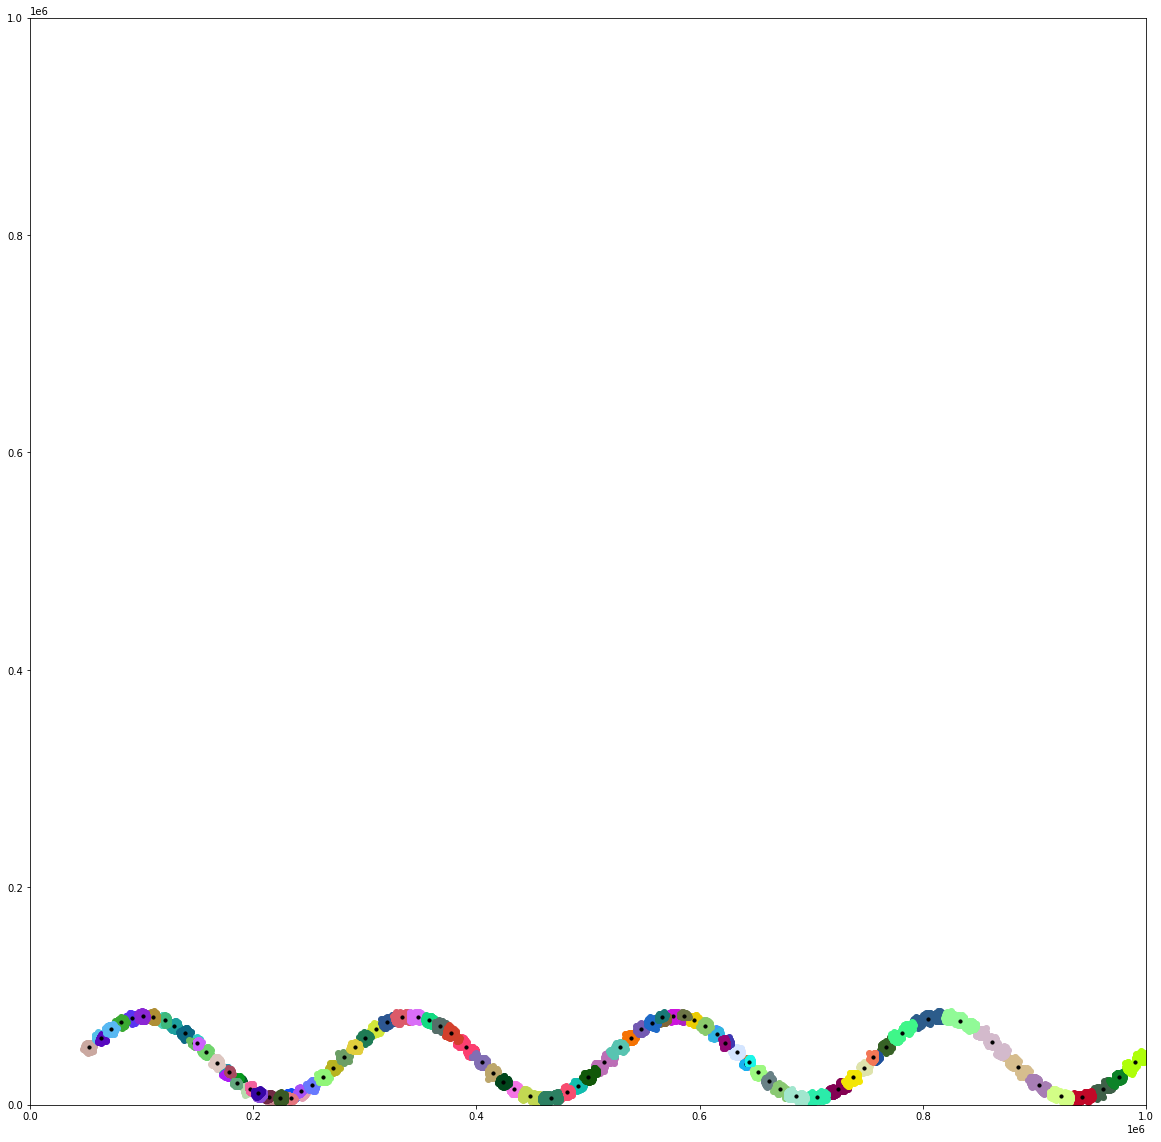

In [ ]:
plt.figure(figsize=(20,20))
for i in range(num_clusters):
    plt.scatter(birch_data[km.label_ == i][:, 0], birch_data[km.label_ == i][:, 1], color=np.random.rand(3,))
    plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], s = 10, color='black')
    plt.xlim([0, 1000000])
    plt.ylim([0, 1000000])
plt.show()

# Birch dataset 2 with kmeans plus plus

In [ ]:
birch_data = np.loadtxt("birch2.txt")
num_clusters = 100

In [ ]:
km = kmeans.KMeans(n_clusters=num_clusters, init="kmeansplusplus")

In [ ]:
%%time
km.fit(birch_data)

Iteration  0 / 1000
Labels_changed :  1009
Iteration  1 / 1000
Labels_changed :  490
Iteration  2 / 1000
Labels_changed :  491
Iteration  3 / 1000
Labels_changed :  436
Iteration  4 / 1000
Labels_changed :  382
Iteration  5 / 1000
Labels_changed :  371
Iteration  6 / 1000
Labels_changed :  529
Iteration  7 / 1000
Labels_changed :  859
Iteration  8 / 1000
Labels_changed :  351
Iteration  9 / 1000
Labels_changed :  121
Iteration  10 / 1000
Labels_changed :  77
Iteration  11 / 1000
Labels_changed :  54
Iteration  12 / 1000
Labels_changed :  41
Iteration  13 / 1000
Labels_changed :  39
Iteration  14 / 1000
Labels_changed :  38
Iteration  15 / 1000
Labels_changed :  46
Iteration  16 / 1000
Labels_changed :  50
Iteration  17 / 1000
Labels_changed :  53
Iteration  18 / 1000
Labels_changed :  53
Iteration  19 / 1000
Labels_changed :  60
Iteration  20 / 1000
Labels_changed :  50
Iteration  21 / 1000
Labels_changed :  49
Iteration  22 / 1000
Labels_changed :  49
Iteration  23 / 1000
Labels_chang

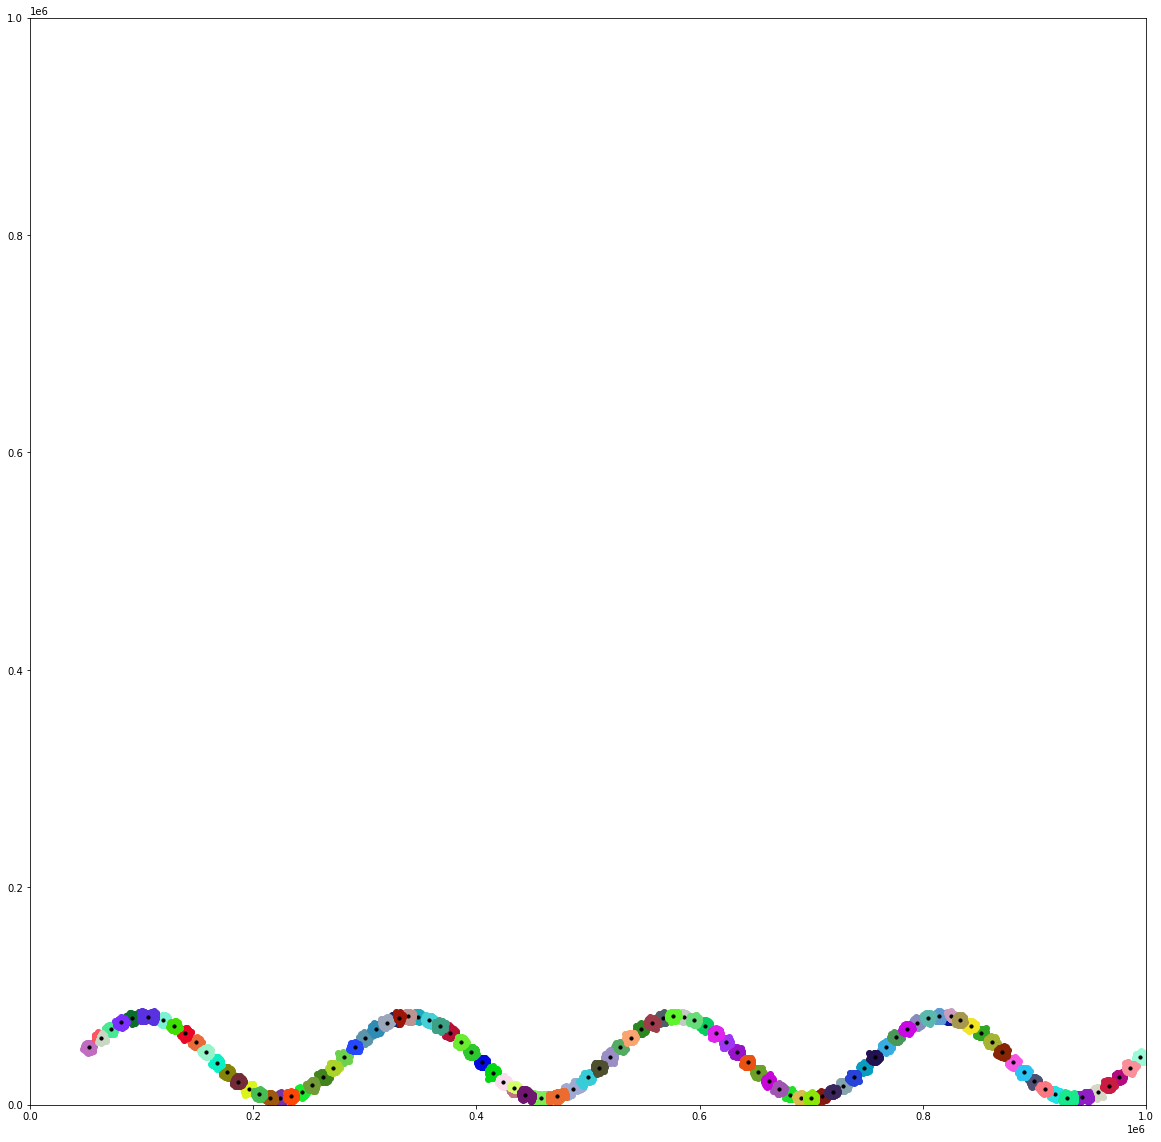

In [ ]:
plt.figure(figsize=(20,20))
for i in range(num_clusters):
    plt.scatter(birch_data[km.label_ == i][:, 0], birch_data[km.label_ == i][:, 1], color=np.random.rand(3,))
    plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], s = 10, color='black')
    plt.xlim([0, 1000000])
    plt.ylim([0, 1000000])
plt.show()

# Birch dataset 3

In [ ]:
birch_data = np.loadtxt("birch3.txt")
num_clusters = 100

In [ ]:
km = kmeans.KMeans(n_clusters=num_clusters, tol=1)

In [ ]:
%%time
km.fit(birch_data)

Iteration  0 / 1000
Labels_changed :  13217
Iteration  1 / 1000
Labels_changed :  7383
Iteration  2 / 1000
Labels_changed :  5805
Iteration  3 / 1000
Labels_changed :  4645
Iteration  4 / 1000
Labels_changed :  3527
Iteration  5 / 1000
Labels_changed :  2578
Iteration  6 / 1000
Labels_changed :  1916
Iteration  7 / 1000
Labels_changed :  1279
Iteration  8 / 1000
Labels_changed :  1000
Iteration  9 / 1000
Labels_changed :  875
Iteration  10 / 1000
Labels_changed :  822
Iteration  11 / 1000
Labels_changed :  696
Iteration  12 / 1000
Labels_changed :  649
Iteration  13 / 1000
Labels_changed :  572
Iteration  14 / 1000
Labels_changed :  496
Iteration  15 / 1000
Labels_changed :  472
Iteration  16 / 1000
Labels_changed :  469
Iteration  17 / 1000
Labels_changed :  434
Iteration  18 / 1000
Labels_changed :  421
Iteration  19 / 1000
Labels_changed :  369
Iteration  20 / 1000
Labels_changed :  331
Iteration  21 / 1000
Labels_changed :  329
Iteration  22 / 1000
Labels_changed :  326
Iteration  

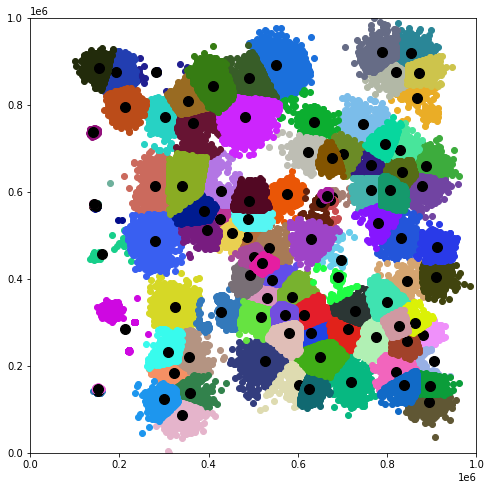

In [ ]:
plt.figure(figsize=(8,8))
for i in range(num_clusters):
    plt.scatter(birch_data[km.label_ == i][:, 0], birch_data[km.label_ == i][:, 1], color=np.random.rand(3,))
    plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], s = 100, color='black')
    plt.xlim([0, 1000000])
    plt.ylim([0, 1000000])
plt.show()

In [ ]:
km.inerita_

52847318780902.64

# Birch dataset 3 with kmeans plus plus

In [ ]:
birch_data = np.loadtxt("birch3.txt")
num_clusters = 100

In [ ]:
km = kmeans.KMeans(n_clusters=num_clusters, init="kmeansplusplus")

In [ ]:
%%time
km.fit(birch_data)

Iteration  0 / 1000
Labels_changed :  6866
Iteration  1 / 1000
Labels_changed :  4144
Iteration  2 / 1000
Labels_changed :  3111
Iteration  3 / 1000
Labels_changed :  2197
Iteration  4 / 1000
Labels_changed :  1535
Iteration  5 / 1000
Labels_changed :  1165
Iteration  6 / 1000
Labels_changed :  904
Iteration  7 / 1000
Labels_changed :  705
Iteration  8 / 1000
Labels_changed :  525
Iteration  9 / 1000
Labels_changed :  440
Iteration  10 / 1000
Labels_changed :  363
Iteration  11 / 1000
Labels_changed :  322
Iteration  12 / 1000
Labels_changed :  258
Iteration  13 / 1000
Labels_changed :  224
Iteration  14 / 1000
Labels_changed :  208
Iteration  15 / 1000
Labels_changed :  213
Iteration  16 / 1000
Labels_changed :  247
Iteration  17 / 1000
Labels_changed :  288
Iteration  18 / 1000
Labels_changed :  324
Iteration  19 / 1000
Labels_changed :  331
Iteration  20 / 1000
Labels_changed :  301
Iteration  21 / 1000
Labels_changed :  284
Iteration  22 / 1000
Labels_changed :  225
Iteration  23 /

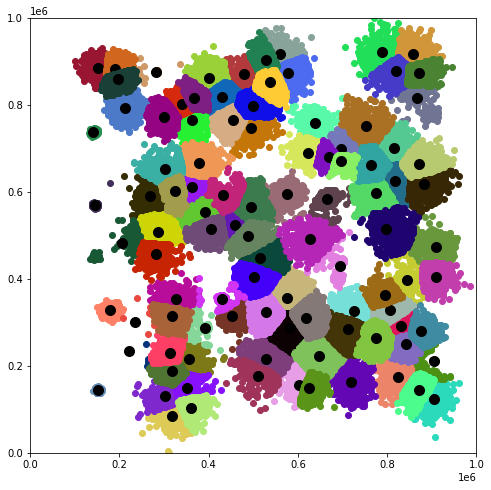

In [ ]:
plt.figure(figsize=(8,8))
for i in range(num_clusters):
    plt.scatter(birch_data[km.label_ == i][:, 0], birch_data[km.label_ == i][:, 1], color=np.random.rand(3,))
    plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], s = 100, color='black')
    plt.xlim([0, 1000000])
    plt.ylim([0, 1000000])
plt.show()

In [ ]:
km.inerita_

39727357303089.664

# Automatically determine K

In [ ]:
%%time
max_clusters_num = 50
error = []
execution_times = []
for cl in range(1, max_clusters_num + 1):
    km = kmeans.KMeans(n_clusters = cl, max_iter=300, init="kmeansplusplus")
    start = timeit.default_timer()
    km.fit(birch_data, verbose=False)
    stop = timeit.default_timer()
    print("executed time for ", cl, " clusters: ", (stop-start), " Seconds")
    execution_times.append(stop - start)
    plt.figure(figsize=(20,20))
    for i in range(cl):
        plt.scatter(birch_data[km.label_ == i][:, 0], birch_data[km.label_ == i][:, 1], color=np.random.rand(3,))
        plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], s = 100, color='black')
        plt.xlim([0, 1000000])
        plt.ylim([0, 1000000])
    fig = plt.gcf()
    fig.savefig("kmeans/" + str(cl)+".png")
    plt.show()
    error.append(km.inerita_)

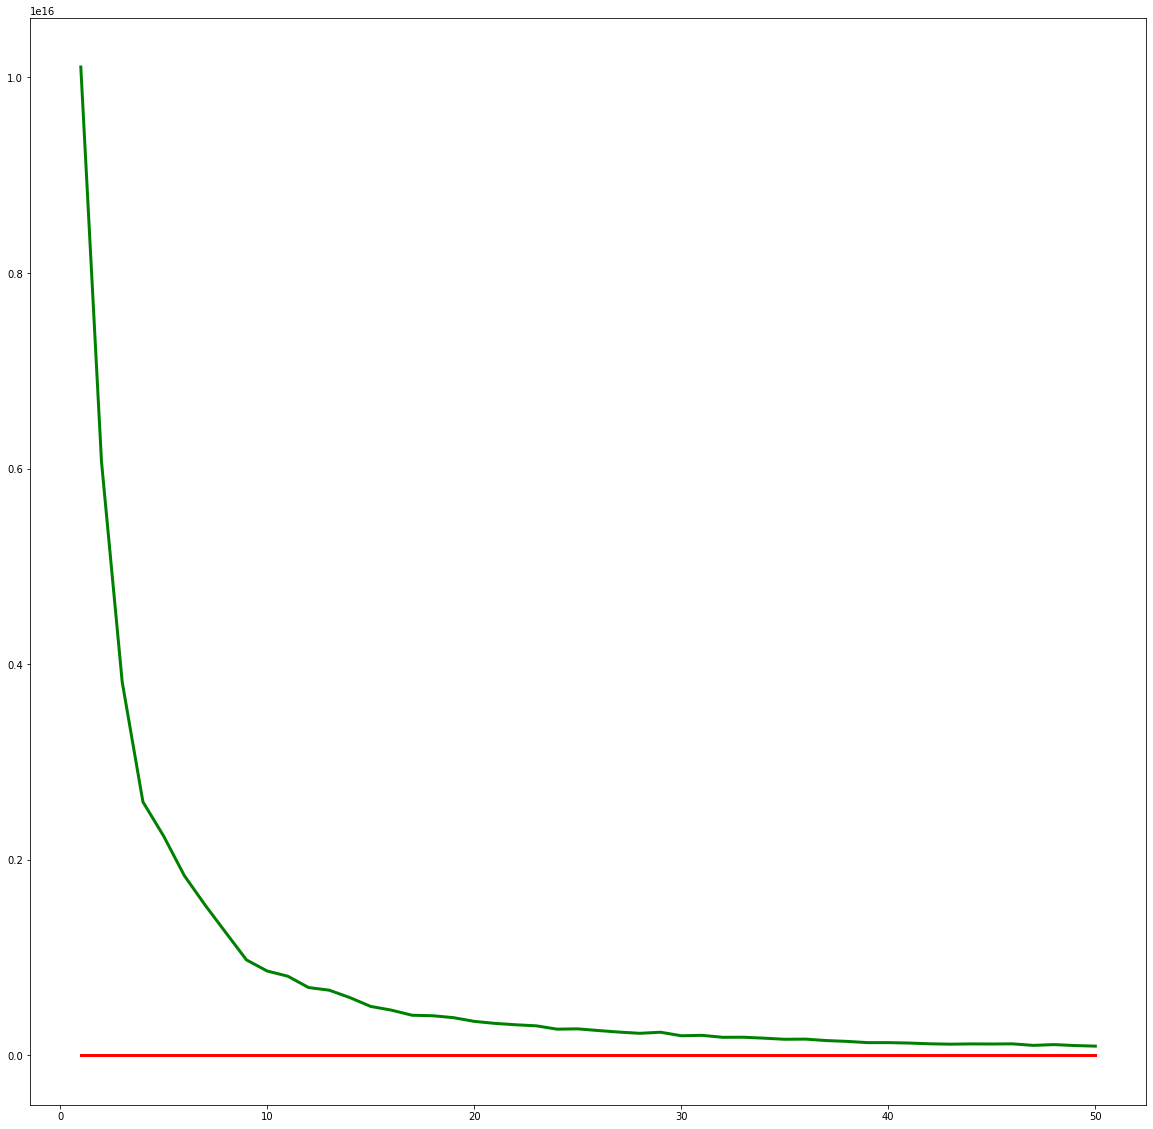

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(range(1, max_clusters_num + 1), error, color ='g', linewidth ='3')
plt.plot(range(1, max_clusters_num + 1), execution_times, color ='r', linewidth ='3')
fig = plt.gcf()
fig.savefig("kmeans/summary.png")
plt.show()

In [ ]:
np.savetxt("kmeans/error.txt", error)

In [ ]:
np.savetxt("kmeans/execution_time.txt", execution_times)